## Load libraries

In [1]:
#### Import librairies
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import collections
from importlib import reload

#sys.path.insert(0,'../../scripts/tools_for_VAE/')
#import tools_for_VAE.layers as layers
#from tools_for_VAE import utils, vae_functions, generator, model
#from tensorflow.keras import backend as K

In [2]:
from astropy.coordinates import SkyCoord
import FoFCatalogMatching
import GCRCatalogs
import fitsio

import lsst.afw.geom as afw_geom
import lsst.afw.table as afw_table
import lsst.daf.persistence as dp
import GCRCatalogs
import lsst.geom

In [3]:
from astropy.io import fits
import warnings
import healpy as hp
from collections import namedtuple
from astropy.table import Table

## First test to plot a field

In [12]:
img_dir = '/sps/lssttest/dataproducts/desc/DC2/Run2.2i/v19.0.0-v1/rerun/run2.2i-coadd-wfd-dr6-v1-grizy/deepCoadd-results/r/5074/'

In [13]:
fits_image_filename = img_dir+'6,5/calexp-r-5074-6,5.fits'
hdul = fits.open(fits_image_filename)

hdul.info()

Filename: /sps/lssttest/dataproducts/desc/DC2/Run2.2i/v19.0.0-v1/rerun/run2.2i-coadd-wfd-dr6-v1-grizy/deepCoadd-results/r/5074/6,5/calexp-r-5074-6,5.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      22   ()      
  1                1 CompImageHDU     34   (4100, 4200)   float32   
  2                1 CompImageHDU     49   (4100, 4200)   int32   
  3                1 CompImageHDU     34   (4100, 4200)   float32   
  4                1 BinTableHDU     40   11668R x 7C   [1J, 1J, 1J, 1J, 1J, 64A, 64A]   
  5                1 BinTableHDU     20   9798R x 2C   [64A, 1J]   
  6                1 BinTableHDU     45   46R x 7C   [1X, 1J, 1J, 1J, 1J, 1J, 1D]   
  7                1 BinTableHDU     16   333R x 1C   [1QB(9539)]   
  8                1 BinTableHDU     28   9752R x 4C   [1J, 1J, 1J, 1D]   
  9                1 BinTableHDU     40   4876R x 6C   [1J, 1J, 1J, 1J, 1J, 9D]   
 10                1 BinTableHDU     20   1060R x 2C   [1D

In [14]:
hdul[0].header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                    8 / number of bits per data pixel                  
NAXIS   =                    0 / number of data axes                            
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
HIERARCH variance_scale = 1.03349248452959                                      
BGMEAN  =  0.00756600964575367                                                  
BGVAR   = 2.04300976222079E-05                                                  
HIERARCH EXPINFO_V =         1                                                  
AR_HDU  =                    5 / HDU (1-indexed) containing the archive used to 
HIERARCH AP_CORR_MAP_ID =    1 / archive ID for generic component 'AP_CORR_MAP' 
HIERARCH ARCHIVE_ID_AP_CORR_

In [15]:
hdul[1].data

array([[-0.03813572,  0.01714079,  0.07495686, ...,  0.00211025,
         0.00210311, -0.02671206],
       [ 0.06917966,  0.05266035,  0.03273228, ...,  0.01055644,
         0.08455504,  0.08244523],
       [ 0.02472612,  0.02197043,  0.01054388, ...,  0.06310571,
         0.03140555,  0.05221613],
       ...,
       [ 0.00875258,  0.00875258,  0.00875258, ...,  0.0087527 ,
         0.0087527 ,  0.0087527 ],
       [ 0.00875258,  0.00875258,  0.00875258, ...,  0.0087527 ,
         0.0087527 ,  0.0087527 ],
       [ 0.00875258,  0.00875258,  0.00875258, ...,  0.0087527 ,
         0.0087527 ,  0.0087527 ]], dtype=float32)

In [16]:
np.min(hdul[1].data[:1000,:1000]), np.max(hdul[1].data[:1000,:1000])

(-0.16066317, 1013.6598)

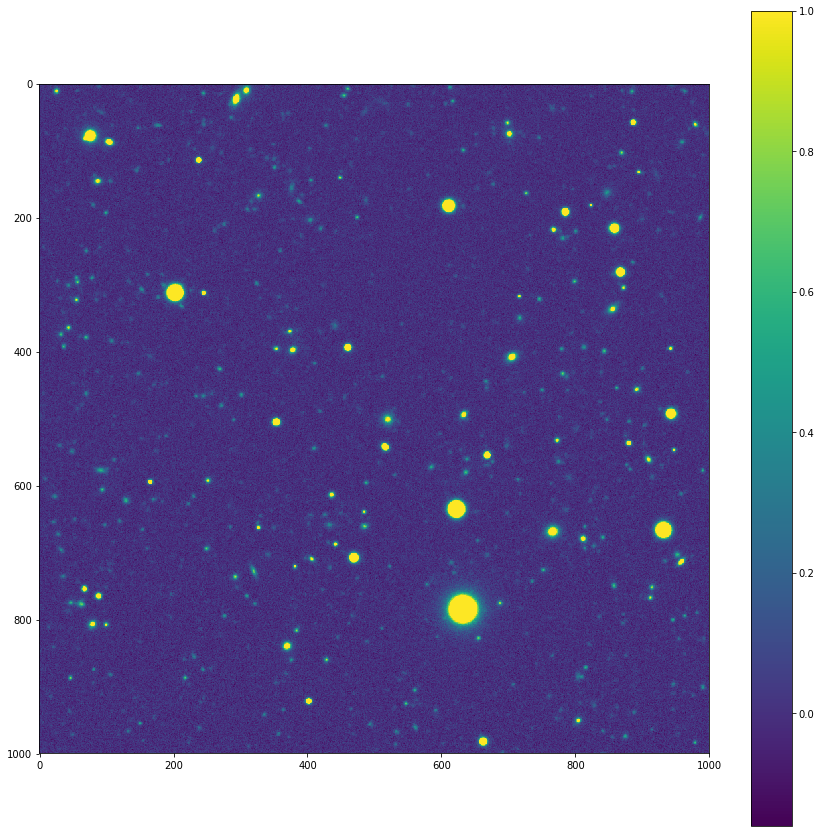

In [17]:
fig = plt.figure(figsize = (15,15))
plt.imshow(hdul[1].data[:1000,:1000], vmax = 1)
plt.colorbar()

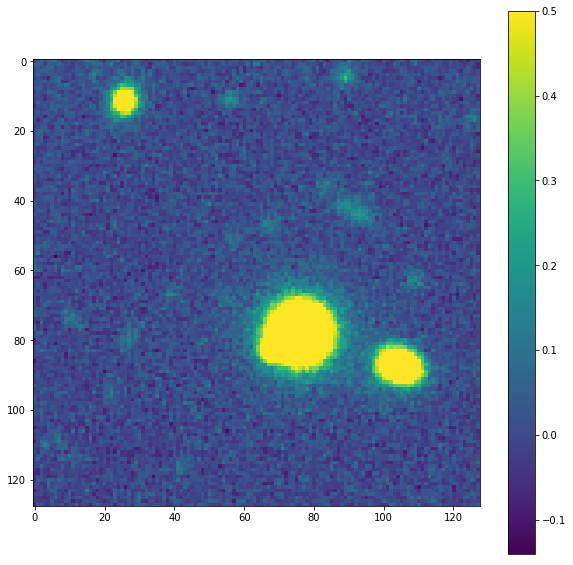

In [18]:
fig = plt.figure(figsize = (10,10))
plt.imshow(hdul[1].data[:128,:128], vmax = 0.5)
plt.colorbar()

In [19]:
evt_data = Table(hdul[5].data)

In [20]:
evt_data

<Table length=9798>
                              name                               field
                             str64                               int32
---------------------------------------------------------------- -----
base_GaussianFlux_instFlux                                           2
base_GaussianFlux_instFluxErr                                      640
base_PsfFlux_instFlux                                              853
base_PsfFlux_instFluxErr                                          1066
ext_convolved_ConvolvedFlux_0_3_3_instFlux                        1279
ext_convolved_ConvolvedFlux_0_3_3_instFluxErr                     1492
ext_convolved_ConvolvedFlux_0_4_5_instFlux                        1705
ext_convolved_ConvolvedFlux_0_4_5_instFluxErr                     1918
ext_convolved_ConvolvedFlux_0_6_0_instFlux                        2131
ext_convolved_ConvolvedFlux_0_6_0_instFluxErr                     2344
                                                             ...   ...
ext_photometryKron_KronFlux_instFlux                              8307
ext_photometryKron_KronFlux_instFluxErr                           8520
modelfit_CModel_dev_instFlux                                      8733
modelfit_CModel_dev_instFluxErr                                   8946
modelfit_CModel_exp_instFlux                                      9159
modelfit_CModel_exp_instFluxErr                                   9372
modelfit_CModel_initial_instFlux                                  9585
modelfit_CModel_initial_instFluxErr                               9798
modelfit_CModel_instFlux                                         10011
modelfit_CModel_instFluxErr                                      10224

## Selecting a patch image

In [34]:
img_dir = '/sps/lssttest/dataproducts/desc/DC2/Run2.2i/v19.0.0-v1/rerun/run2.2i-coadd-wfd-dr6-v1-grizy/deepCoadd/r/4855/6,5/'

fits_image_filename = img_dir+'warp-r-4855-6,5-982942.fits'
hdul = fits.open(fits_image_filename)

hdul.info()

Filename: /sps/lssttest/dataproducts/desc/DC2/Run2.2i/v19.0.0-v1/rerun/run2.2i-coadd-wfd-dr6-v1-grizy/deepCoadd/r/4855/6,5/warp-r-4855-6,5-982942.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      36   ()      
  1                1 CompImageHDU     34   (4100, 4200)   float32   
  2                1 CompImageHDU     45   (4100, 4200)   int32   
  3                1 CompImageHDU     34   (4100, 4200)   float32   
  4                1 BinTableHDU     40   311R x 7C   [1J, 1J, 1J, 1J, 1J, 64A, 64A]   
  5                1 BinTableHDU     20   230R x 2C   [64A, 1J]   
  6                1 BinTableHDU     45   46R x 7C   [1X, 1J, 1J, 1J, 1J, 1J, 1D]   
  7                1 BinTableHDU     16   6R x 1C   [1QB(9533)]   
  8                1 BinTableHDU     28   184R x 4C   [1J, 1J, 1J, 1D]   
  9                1 BinTableHDU     40   92R x 6C   [1J, 1J, 1J, 1J, 1J, 9D]   
 10                1 BinTableHDU     40   96R x 6C   [1J, 1J, 1J, 1J,

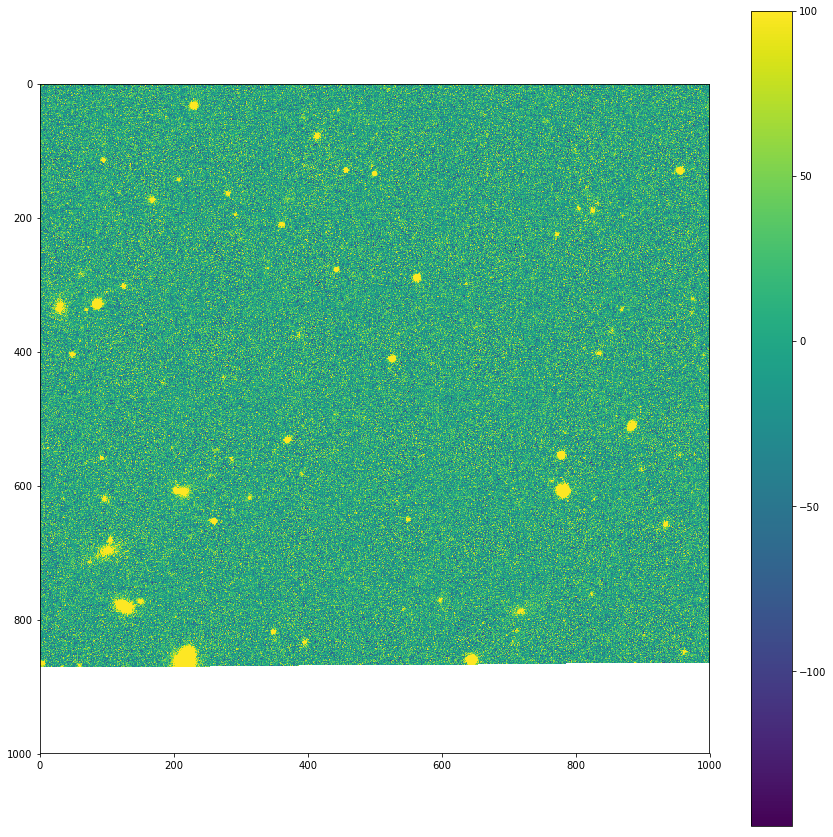

In [35]:
fig = plt.figure(figsize = (15,15))
plt.imshow(hdul[1].data[:1000,:1000], vmax = 100)
plt.colorbar()

In [6]:
img_dir = '/sps/lssttest/dataproducts/desc/DC2/Run2.2i/v19.0.0-v1/rerun/run2.2i-coadd-wfd-dr6-v1-grizy/deepCoadd/r/4855/6,5/'

fits_image_filename = img_dir+'psfMatchedWarp-r-4855-6,5-982942.fits'
hdul_psf = fits.open(fits_image_filename)

hdul_psf.info()

Filename: /sps/lssttest/dataproducts/desc/DC2/Run2.2i/v19.0.0-v1/rerun/run2.2i-coadd-wfd-dr6-v1-grizy/deepCoadd/r/4855/6,5/psfMatchedWarp-r-4855-6,5-982942.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      36   ()      
  1                1 CompImageHDU     34   (4100, 4200)   float32   
  2                1 CompImageHDU     45   (4100, 4200)   int32   
  3                1 CompImageHDU     34   (4100, 4200)   float32   
  4                1 BinTableHDU     40   309R x 7C   [1J, 1J, 1J, 1J, 1J, 64A, 64A]   
  5                1 BinTableHDU     20   230R x 2C   [64A, 1J]   
  6                1 BinTableHDU     45   46R x 7C   [1X, 1J, 1J, 1J, 1J, 1J, 1D]   
  7                1 BinTableHDU     16   5R x 1C   [1QB(9533)]   
  8                1 BinTableHDU     28   184R x 4C   [1J, 1J, 1J, 1D]   
  9                1 BinTableHDU     40   92R x 6C   [1J, 1J, 1J, 1J, 1J, 9D]   
 10                1 BinTableHDU     40   96R x 6C   [1J, 1

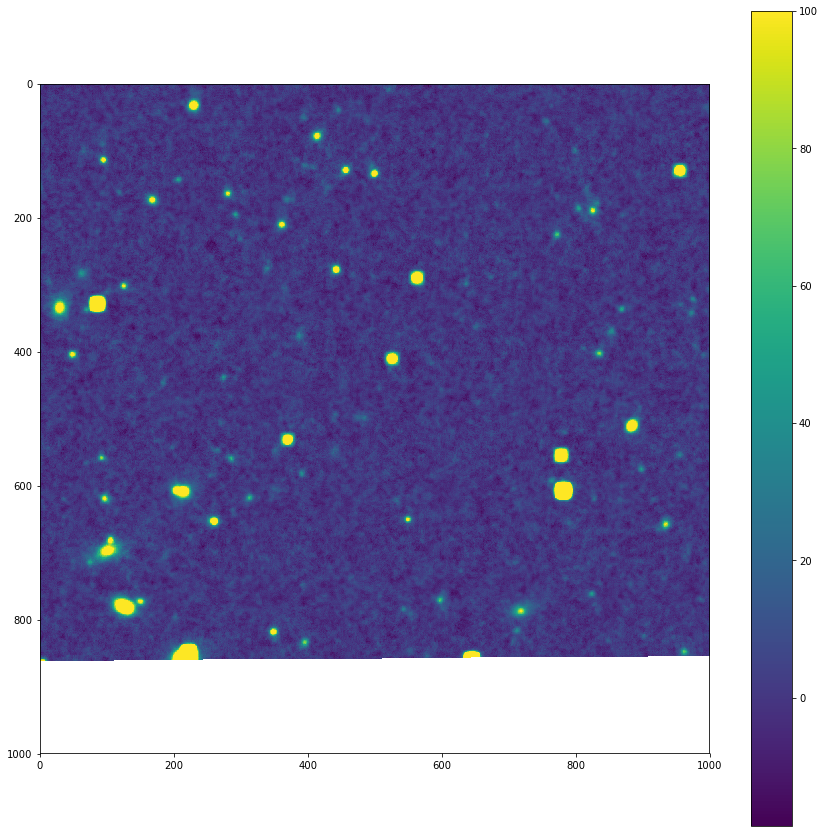

In [7]:
fig = plt.figure(figsize = (15,15))
plt.imshow(hdul_psf[1].data[:1000,:1000], vmax = 100)
plt.colorbar()

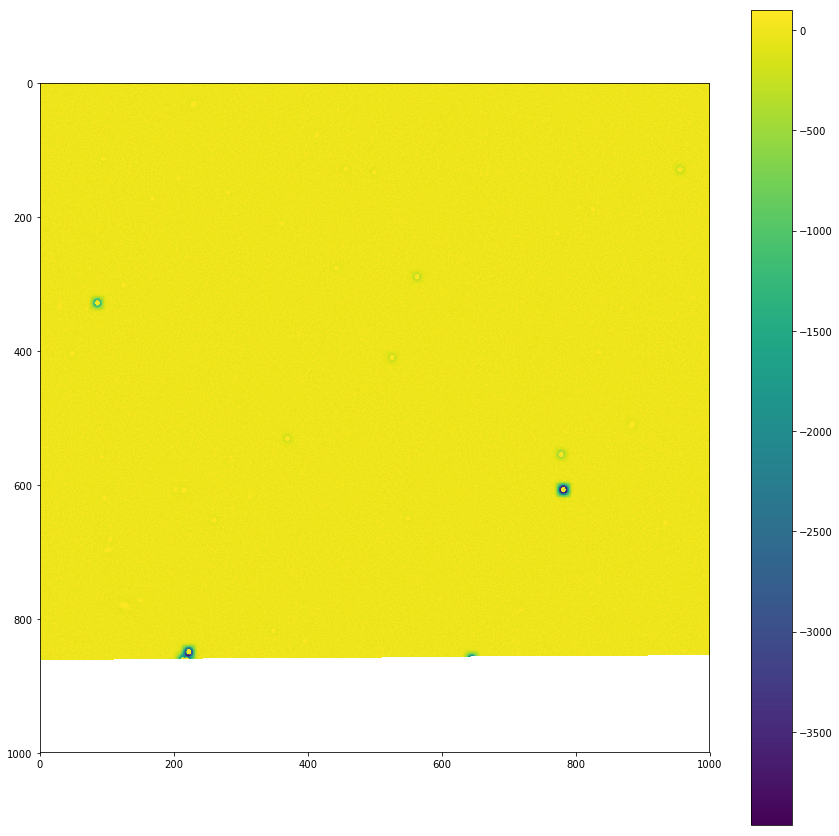

In [8]:
fig = plt.figure(figsize = (15,15))
plt.imshow(hdul[1].data[:1000,:1000]-hdul_psf[1].data[:1000,:1000], vmax = 100)#
plt.colorbar()

In [9]:
evt_data = Table(hdul[4].data)
evt_data

<Table length=311>
  id  ...                              module                             
int32 ...                              str64                              
----- ... ----------------------------------------------------------------
    3 ... lsst.afw.geom                                                   
    2 ... lsst.meas.algorithms                                            
    4 ... lsst.afw.math                                                   
    5 ... lsst.afw.geom                                                   
    6 ... lsst.afw.math                                                   
    7 ... lsst.afw.geom                                                   
    8 ... lsst.afw.math                                                   
    9 ... lsst.afw.geom                                                   
   10 ... lsst.afw.math                                                   
   11 ... lsst.afw.geom                                                   
  ... ...                                                              ...
  253 ... lsst.meas.extensions.psfex                                      
  253 ... lsst.meas.extensions.psfex                                      
  255 ... lsst.afw.math                                                   
  254 ...                                                                 
  256 ... lsst.afw.image                                                  
  257 ...                                                                 
  237 ... lsst.afw.image                                                  
  259 ... lsst.afw.geom                                                   
  258 ... lsst.meas.algorithms                                            
  258 ... lsst.meas.algorithms


## How To Create a Source Catalog

In order to use the Stack's spatial matching code, we will need to reformat the extragalactic catalog galaxy position and magnitude information into an afw SourceCatalog object. These table objects are initialized by a "schema", which in turn is built from column definition "Coldef" objects. The mag_cols function below shows how these Coldefs can be created.


In [4]:
def make_SourceCatalog(new_cols):
    """
    Make a SourceCatalog to contain id and coordinates for each object, plus any new
    columns.
    
    Parameters
    ----------
    new_cols: list of Coldefs
        Column info for adding to an afw.table schema.

    Returns
    -------
    lsst.afw.table.SourceCatalog: An empty SourceCatalog with the desired schema.
    """
    # The minimal schema just contains the `id`, `coord_ra`, and `coord_dec` fields.
    schema = afw_table.SourceTable.makeMinimalSchema()
    for coldef in new_cols:
        schema.addField(coldef.name, type=coldef.type, doc=coldef.doc)
    return afw_table.SourceCatalog(schema)


def mag_cols(bands):
    """Return column information for adding magnitude columns to an afw.table schema."""
    Coldef = namedtuple('Coldef', 'name type doc'.split())
    return [Coldef(f'mag_{x}', float, f'{x}-magnitude')
            for x in bands]


## Selecting Galaxies

We are going to downselect cosmoDC2 to the sky region being considered. We'll make a general-purpose RegionSelector class, and then sub-class it for selecting objects in either CCDs or patches.

In [5]:
class RegionSelector:
    """
    Class to rotate the protoDC2 galaxies to the Run1.1p sky location and downselect those galaxies
    based on a magnitude limit and on the coordinates of the subregion (i.e., patch or CCD) being
    considered.
    """

    def __init__(self):
        pass
    
    def _set_coord_range(self, bbox, wcs):
        """
        Set the coordinate range of the region.
        
        Notes
        -----
        This method is used by the RegionSelector's subclasses.
        
        Parameters
        ----------
        bbox: Calexp.BBox
            Defines corners of region's bounding box
        wcs: Calexp.Wcs
            Defines pixel to world (sky) coordinate transformation
        """
        region_box = lsst.geom.Box2D(bbox)
        corners = region_box.getCorners()
        ra_values, dec_values = [], []
        for corner in corners:
            ra, dec = wcs.pixelToSky(corner)
            ra_values.append(ra.asDegrees())
            dec_values.append(dec.asDegrees())
        self.ra_range = min(ra_values), max(ra_values)
        self.dec_range = min(dec_values), max(dec_values)

    def __call__(self, gc, band, max_mag):
        """
        Create a SourceCatalog object from the input galaxy catalog for the specified band, and
        apply the region and magnitude cuts.

        Parameters
        ----------
        gc: GCRCatalogs GalaxyCatalog
            The galaxy catalog obtained via GCR.
        band: str
            The band, e.g., 'i', to use for the magnitude comparison with the values measured
            from the simulated data.
        max_mag: float
            The magnitude limit to apply.

        Returns
        -------
        lsst.afw.table.SourceCatalog
        """
        # Retrieve the healpix pixels corresponding to the catalog so we don't query the full catalog
        vertices = hp.ang2vec(np.array([self.ra_range[0], self.ra_range[1],
                                        self.ra_range[1], self.ra_range[0]]),
                              np.array([self.dec_range[0], self.dec_range[0],
                                        self.dec_range[1], self.dec_range[1]]), lonlat=True)
        ipix = hp.query_polygon(32, vertices, inclusive=True)
        # We are going to pass the healpixels that overlap with our catalog as native filters to speed up the process
        native_filter = f'(healpix_pixel == {ipix[0]})'
        for ipx in ipix:
            native_filter=native_filter+f' | (healpix_pixel == {ipx})'
        # Retrieve the desired columns and cut on the magnitude values.
        bandname = f'mag_{band}'
        filter_ = f'{bandname} < {max_mag}'
        print("Applying magnitude filter:", filter_)
        gc_cols = gc.get_quantities(['galaxy_id', 'ra', 'dec',
                                     bandname], filters=[filter_, 
                                                         f'ra > {self.ra_range[0]}',
                                                         f'ra < {self.ra_range[1]}',
                                                         f'dec > {self.dec_range[0]}',
                                                         f'dec < {self.dec_range[1]}',
                                                        ],
                                    native_filters = native_filter)
        print("Number of galaxies within region:", len(gc_cols['ra']))

        # Create a SourceCatalog with the galaxy_ids, coordinates, magnitudes
        galaxy_catalog = make_SourceCatalog(mag_cols((band,)))
        for id_, ra, dec, mag in zip(gc_cols['galaxy_id'], gc_cols['ra'], gc_cols['dec'], gc_cols[bandname]):
            record = galaxy_catalog.addNew()
            record.set('id', id_)
            record.set('coord_ra', lsst.geom.Angle(ra, lsst.geom.degrees))
            record.set('coord_dec', lsst.geom.Angle(dec, lsst.geom.degrees))
            record.set(f'mag_{band}', mag)
        return galaxy_catalog

In [6]:
class CcdSelector(RegionSelector):
    """RegionSelector to use with visit-level calexps, i.e., single CCD exposures."""
    def __init__(self, butler, visit, raft, sensor):
        super(CcdSelector, self).__init__()
        # Get the CCD boundaries
        dataId = dict(visit=visit, raft=raft, sensor=sensor)
        calexp = butler.get('calexp', dataId=dataId)
        self._set_coord_range(calexp.getBBox(), calexp.getWcs())


class PatchSelector(RegionSelector):
    """RegionSelector to use with skyMap patches, i.e., coadd data."""
    def __init__(self, butler, tract, patch):
        super(PatchSelector, self).__init__()
        # Get the patch boundaries.
        skymap = butler.get('deepCoadd_skyMap')
        tractInfo = skymap[tract]
        patchInfo = tractInfo.getPatchInfo(eval(patch))
        self._set_coord_range(patchInfo.getOuterBBox(), tractInfo.getWcs())

# Test with butler

In [10]:
# Create a data butler for the repo.
repo = '/sps/lssttest/dataproducts/desc/DC2/Run2.2i/v19.0.0-v1/rerun/run2.2i-coadd-wfd-dr6-v1-grizy'#'/global/cfs/cdirs/lsst/production/DC2_ImSim/Run2.2i/desc_dm_drp/v19.0.0-v1/rerun/run2.2i-coadd-wfd-dr3-v1'
butler = dp.Butler(repo)

mag_max = 27.5

# Get the coadd catalog for a selected filter, tract, and patch:
filter_ = 'r'
tract = 4855
patch = '6,5'
title = f'Run2.2i-DR3, filter={filter_}, tract={tract}, patch={patch}'
dataId = dict(tract=tract, patch=patch, filter=filter_)
#catalog = butler.get('deepCoadd-results', dataId=dataId)#deepCoadd_meas
calexp = butler.get('deepCoadd', dataId=dataId)
calib = calexp.getPhotoCalib()
flux_model = 'modelfit_CModel'
region_selector = PatchSelector(butler, tract, patch)

# Test with GCR Catalogs

## Read in measured catalog

In [11]:
# Read in the galaxy catalog data.
with warnings.catch_warnings():
    warnings.filterwarnings('ignore')
    gc_obs = GCRCatalogs.load_catalog('dc2_object_run2.2i_dr6_wfd')#run2.2i-coadd-wfd-dr6-v1

## Match with true catalog

In [12]:
# Read in the galaxy catalog data.
with warnings.catch_warnings():
    warnings.filterwarnings('ignore')
    gc = GCRCatalogs.load_catalog('cosmoDC2_v1.1.4_image')

In [13]:
gc

Select data from the right tract and apply the cut in magnitude

In [14]:
# Let's also define a magnitude cut
mag_filters = [
    (np.isfinite, 'mag_r'),
    'mag_r < 27.5',
]

In [15]:
# Load ra and dec from object, using both of the filters we just defined.
object_data = gc_obs.get_quantities(['ra', 'dec', 'mag_i_cModel'],
                                        filters=(mag_filters), native_filters=['tract == 4855'])

/pbs/home/b/barcelin/pbs_throng_link/lsst_stack/conda/miniconda3-py37_4.8.2/envs/lsst-scipipe-1a1d771/lib/python3.7/site-packages/GCRCatalogs-1.0.1-py3.7.egg/GCRCatalogs/dc2_dm_catalog.py:44: RuntimeWarning: invalid value encountered in log10
  return -2.5 * np.log10(flux) + AB_mag_zp_wrt_nanoJansky
/pbs/home/b/barcelin/pbs_throng_link/lsst_stack/conda/miniconda3-py37_4.8.2/envs/lsst-scipipe-1a1d771/lib/python3.7/site-packages/GCRCatalogs-1.0.1-py3.7.egg/GCRCatalogs/dc2_dm_catalog.py:44: RuntimeWarning: divide by zero encountered in log10
  return -2.5 * np.log10(flux) + AB_mag_zp_wrt_nanoJansky


Now use the data from the observe catalog to apply filter in position and magnitude on true filter

In [16]:
max_ra = np.nanmax(object_data['ra'])
min_ra = np.nanmin(object_data['ra'])
max_dec = np.nanmax(object_data['dec'])
min_dec = np.nanmin(object_data['dec'])
vertices = hp.ang2vec(np.array([min_ra, max_ra, max_ra, min_ra]),
                      np.array([min_dec, min_dec, max_dec, max_dec]), lonlat=True)
ipix = hp.query_polygon(32, vertices, inclusive=True)
native_filter = f'(healpix_pixel == {ipix[0]})'
for ipx in ipix:
    native_filter=native_filter+f' | (healpix_pixel == {ipx})'
pos_filters=[f'ra >= {min_ra}',f'ra <={max_ra}', f'dec >= {min_dec}', f'dec <= {max_dec}']

In [17]:
truth_mag_filters = ['mag_i < 24.7']
quantities = ['galaxy_id', 'ra', 'dec', 'mag_i', 'redshift']
truth_data = gc.get_quantities(quantities, filters=truth_mag_filters+pos_filters, 
                                      native_filters=native_filter)

Match the catalogs

In [18]:
# now we can really do the matching!
# FoFCatalogMatching.match takes a dictionary of catalogs to match, a friends-of-friends linking length. 
# Because our "catalog" is not an astropy table or pandas dataframe, 
# `len(truth_coord)` won't give the actual length of the table
# so we need to specify `catalog_len_getter` so that the code knows how to get the length of the catalog.

results = FoFCatalogMatching.match(
    catalog_dict={'truth': truth_data, 'object': object_data},
    linking_lengths=1.0, # Linking length of 1 arcsecond, you can play around with the values!
    catalog_len_getter=lambda x: len(x['ra']),
)

In [19]:
results

<Table length=1185037>
row_index catalog_key group_id
  int64       str6     int64  
--------- ----------- --------
        0       truth        0
   821358      object        0
        1       truth        1
   825746      object        1
        2       truth        2
   823832      object        2
        3       truth        3
   934130      object        3
        4       truth        4
   950362      object        4
      ...         ...      ...
   951200      object   954040
   951201      object   954041
   951202      object   954042
   951203      object   954043
   951204      object   954044
   951205      object   954045
   951206      object   954046
   951207      object   954047
   951208      object   954048
   951209      object   954049

In [20]:
# first we need to know which rows are from the truth catalog and which are from the object
truth_mask = results['catalog_key'] == 'truth'
object_mask = ~truth_mask


# then np.bincount will give up the number of id occurrences (like historgram but with integer input)
n_groups = results['group_id'].max() + 1
n_truth = np.bincount(results['group_id'][truth_mask], minlength=n_groups)
print(n_truth[n_truth>10])
n_object = np.bincount(results['group_id'][object_mask], minlength=n_groups)



# Let's further inspect the objects in the groups that have 1-to-1 truth/object match.
# first, let's find our the IDs of the groups that have 1-to-1 truth/object match:
one_to_one_group_mask = np.in1d(results['group_id'], np.flatnonzero((n_truth == 1) & (n_object == 1)))

# and then we can find the row indices in the *original* truth/object catalogs for those 1-to-1 groups
truth_idx = results['row_index'][one_to_one_group_mask & truth_mask]
object_idx = results['row_index'][one_to_one_group_mask & object_mask]

[]


In [21]:
truth_sc = SkyCoord(truth_data['ra'][truth_idx], truth_data['dec'][truth_idx], unit="deg")
object_sc = SkyCoord(object_data['ra'][object_idx], object_data['dec'][object_idx], unit="deg")

truth_sc_pix_ra = truth_sc.ra.arcsec/0.2
truth_sc_pix_dec = truth_sc.dec.arcsec/0.2
object_sc_pix_ra = object_sc.ra.arcsec/0.2
object_sc_pix_dec = object_sc.dec.arcsec/0.2

In [22]:
truth_sc_pix_ra.size

217138

In [23]:
truth_sc_pix_ra

array([1142112.24943503, 1141965.77946857, 1142131.66252627, ...,
       1155693.69715588, 1139095.03166658, 1141732.78798575])

In [42]:
truth_sc.ra.arcsec

array([228422.44988701, 228393.15589371, 228426.33250525, ...,
       231138.73943118, 227819.00633332, 228346.55759715])

In [41]:
truth_sc.ra.arcsec/3600

array([63.45068052, 63.4425433 , 63.45175903, ..., 64.2052054 ,
       63.28305731, 63.42959933])

In [32]:
truth_data['ra'][truth_idx]

array([63.45068052, 63.4425433 , 63.45175903, ..., 64.2052054 ,
       63.28305731, 63.42959933])

In [33]:
print(max_ra, max_dec, min_ra, min_dec)

64.76635282536789 -28.264465710289365 63.08411365904906 -29.752060108264118


In [38]:
print((np.max(object_sc.ra.arcsec)-np.min(object_sc.ra.arcsec))/0.2)

30279.50761718079


In [8]:
4100*0.2

13.666666666666666

{'ra': array([64.76303941, 64.6766735 , 64.73970609, ..., 63.18318405,
       63.20182983, 63.2022406 ]), 'dec': array([-29.75205859, -29.75184812, -29.75148608, ..., -28.33164764,
       -28.2976651 , -28.29750531])}


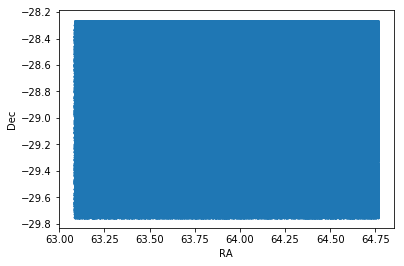

In [28]:
for object_data in gc_obs.get_quantities(['ra', 'dec'], native_filters=['tract == 4855'], return_iterator=True):
    print(object_data)
    plt.scatter(object_data['ra'], object_data['dec'], s=1, rasterized=True);

plt.xlabel('RA');
plt.ylabel('Dec');

{'ra': array([64.76303941, 64.6766735 , 64.73970609, ..., 63.18318405,
       63.20182983, 63.2022406 ]), 'dec': array([-29.75205859, -29.75184812, -29.75148608, ..., -28.33164764,
       -28.2976651 , -28.29750531])}


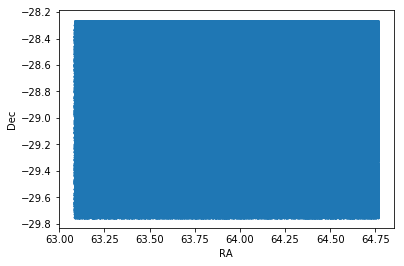

In [41]:
for object_data in gc_obs.get_quantities(['ra', 'dec'], native_filters=['tract == 4855'], return_iterator=True):
    print(object_data)
    plt.scatter(object_data['ra'], object_data['dec'], s=1, rasterized=True);

plt.xlabel('RA');
plt.ylabel('Dec');

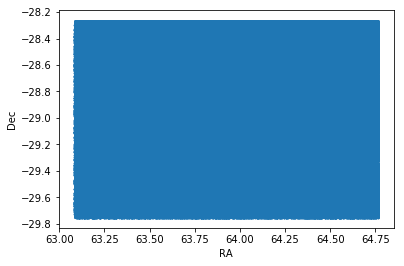

In [36]:
# Let's first visually inspect the footprint of one tract of the object catalog.
plt.scatter(object_data['ra'], object_data['dec'], s=1, rasterized=True);

plt.xlabel('RA');
plt.ylabel('Dec');

In [42]:
object_data['patch']

KeyError: 'patch'

In [ ]:
fig = plt.figure(figsize = (15,15))
plt.imshow(hdul[1].data[:1000,:1000], vmax = 100)
plt.colorbar()

### Extracting the Truth Info

We can now use our region_selector object to process the protoDC2 extragalactic catalog. Note that while we instantiated it with a butler, so that it could work on selecting galaxy observations from either a tract or a CCD, we can _call_ it as a function (via its `__call__` method) which takes a GCR catalog object as its first argument. The result will be a DM Stack SourceCatalog object, that we can match to our observed DRP catalog.

In [14]:
# Create a SourceCatalog from the gc data, applying the region and magnitude selections.
galaxy_catalog = region_selector(gc, band=filter_, max_mag=mag_max)

Applying magnitude filter: mag_r < 27.5
Number of galaxies within region: 37780


In [22]:
galaxy_catalog

<class 'lsst.afw.table.SourceCatalog'>
Non-contiguous afw.Catalog of 37780 rows.
columns: id coord_ra coord_dec parent mag_r

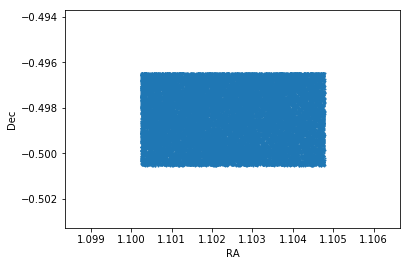

In [23]:
# Let's first visually inspect the footprint of one tract of the object catalog.
plt.scatter(galaxy_catalog['coord_ra'], galaxy_catalog['coord_dec'], s=1, rasterized=True);

plt.xlabel('RA');
plt.ylabel('Dec');

## Extracting measured info

In [24]:
# Read in the galaxy catalog data.
with warnings.catch_warnings():
    warnings.filterwarnings('ignore')
    gc_obs = GCRCatalogs.load_catalog('dc2_object_run2.2i_dr6_wfd')

In [31]:
gc_obs.list_all_quantities(include_native=False)

['cModelFlux_flag_r',
 'Ixx_r',
 'Ixx_i',
 'magerr_z',
 'psFlux_r',
 'Ixx',
 'clean',
 'IxxPSF_u',
 'psFluxErr_i',
 'Iyy_i',
 'I_flag_i',
 'psFluxErr_r',
 'snr_r_cModel',
 'magerr_z_cModel',
 'cModelFluxErr_g',
 'Ixx_g',
 'Ixy_z',
 'psf_fwhm_r',
 'IxyPSF_r',
 'IxxPSF',
 'IyyPSF_r',
 'IxxPSF_g',
 'magerr_u',
 'mag_r',
 'mag_i',
 'psNdata',
 'mag_g',
 'magerr_i',
 'ra',
 'psf_fwhm_u',
 'cModelFlux_r',
 'cModelFlux_flag_u',
 'cModelFlux_g',
 'cModelFluxErr_y',
 'snr_y_cModel',
 'Iyy_u',
 'cModelFluxErr_u',
 'snr_z_cModel',
 'IyyPSF_y',
 'mag_u_cModel',
 'Iyy_z',
 'cModelFlux_i',
 'psFlux_flag_g',
 'Ixy',
 'good',
 'magerr_i_cModel',
 'IxyPSF_y',
 'IxyPSF_g',
 'blendedness',
 'psFluxErr_z',
 'I_flag_y',
 'IxyPSF_z',
 'magerr_y_cModel',
 'psFlux_flag_y',
 'magerr_r',
 'mag_i_cModel',
 'psFlux_u',
 'yErr',
 'Iyy_g',
 'IyyPSF_i',
 'psf_fwhm_y',
 'magerr_y',
 'mag_g_cModel',
 'psFluxErr_g',
 'psf_fwhm_i',
 'mag_z',
 'IxxPSF_z',
 'psFlux_y',
 'Ixx_u',
 'x',
 'cModelFluxErr_r',
 'IyyPSF_g',
 'I_

In [15]:
# Create a SourceCatalog from the gc data, applying the region and magnitude selections.
galaxy_catalog_obs = region_selector(gc_obs, band=filter_, max_mag=mag_max)

Applying magnitude filter: mag_r < 27.5


ValueError: Native quantity `galaxy_id` does not exist (required by `galaxy_id`)

### Focusing on Well-measured Galaxies

Galaxies can be selected as extended objects (or sources) using the `base_ClassificationExtendedness_value`. We use the model flag and flux to ensure that a flux value could be measured, ~~and then apply a selection to ensure that we get deblended objects.~~ Finally, we apply a relatively bright magnitude cut, to avoid confusion when performing the positional match.

In [37]:
catalog = calexp

In [42]:
catalog.

<bound method PyCapsule.getInfo of <lsst.afw.image.exposure.exposure.ExposureF object at 0x7f927d8b6ef0>>

In [38]:
# Extract columns to use in the selection:
#ext = catalog.get('base_ClassificationExtendedness_value')
#model_flag = catalog.get(flux_model + '_flag')
#model_flux = catalog.get(flux_model + '_instFlux')
#num_children = catalog.get('deblend_nChild')

ext = catalog['base_ClassificationExtendedness_value']
model_flag = catalog[flux_model + '_flag']
model_flux = catalog[flux_model + '_instFlux']
num_children = catalog['deblend_nChild']

# Apply the extendedness, flag, and blendedness cuts using the subset method:
cat_temp = catalog.subset((ext == 1) &
                          (model_flag == False) &
                          (model_flux > 0))
# Extract the magnitude and again use subset to apply the depth cut:
_mag = calib.instFluxToMagnitude(cat_temp, flux_model) 
mag = _mag[:,0] #Magnitude
magerr = _mag[:,1] #Magnitude Error
#print(mag, len(mag))
cat_temp = cat_temp.subset(mag < mag_max)

# Repackage everything in a more minimal SourceCatalog and add a magnitude column for comparing
# to the galaxy catalog truth values.
drp_catalog = make_SourceCatalog(mag_cols((filter_,)))
for record in cat_temp:
    new_rec = drp_catalog.addNew()
    for name in 'id coord_ra coord_dec parent'.split():
        new_rec.set(name, record[name])
    mag = calib.instFluxToMagnitude(record, flux_model)
    new_rec.set(f'mag_{filter_}', mag.value)
                
print("Number of observed objects in our DRP galaxy catalog", len(drp_catalog))

ValueError: too many values to unpack (expected 2)

### Doing the Matching
We can now carry out the spatial matching, and compute some quantities to plot.

In [30]:
# Find positional matches within 100 milliarcseconds:
radius = lsst.geom.Angle(0.1, lsst.geom.arcseconds)
matches = afw_table.matchRaDec(drp_catalog, galaxy_catalog, radius)

TypeError: matchRaDec(): incompatible function arguments. The following argument types are supported:
    1. (cat1: lsst.afw.table.SimpleCatalog, cat2: lsst.afw.table.SimpleCatalog, radius: lsst.geom.Angle, mc: lsst.afw.table.MatchControl=<lsst.afw.table.MatchControl object at 0x7f92832b2f70>) -> List[lsst.afw.table.SimpleMatch]
    2. (cat1: lsst.afw.table.SimpleCatalog, cat2: lsst.afw.table.SourceCatalog, radius: lsst.geom.Angle, mc: lsst.afw.table.MatchControl=<lsst.afw.table.MatchControl object at 0x7f92832b61b0>) -> List[lsst.afw.table.ReferenceMatch]
    3. (cat1: lsst.afw.table.SourceCatalog, cat2: lsst.afw.table.SourceCatalog, radius: lsst.geom.Angle, mc: lsst.afw.table.MatchControl=<lsst.afw.table.MatchControl object at 0x7f92832b63b0>) -> List[lsst.afw.table.SourceMatch]
    4. (cat: lsst.afw.table.SimpleCatalog, radius: lsst.geom.Angle, mc: lsst.afw.table.MatchControl=<lsst.afw.table.MatchControl object at 0x7f92832b6230>) -> List[lsst.afw.table.SimpleMatch]
    5. (cat: lsst.afw.table.SourceCatalog, radius: lsst.geom.Angle, mc: lsst.afw.table.MatchControl=<lsst.afw.table.MatchControl object at 0x7f92832b64b0>) -> List[lsst.afw.table.SourceMatch]

Invoked with: <lsst.afw.image.exposure.exposure.ExposureF object at 0x7f927d8b6ef0>, <class 'lsst.afw.table.SourceCatalog'>
Non-contiguous afw.Catalog of 37780 rows.
columns: id coord_ra coord_dec parent mag_r, 4.84814e-07 rad

`matches` is a list of `match` objects, each one containing an observed-true matchd galaxy pair. The code below shows how to work with these, looping over the matches and extracting information to plot.

In [ ]:
# Compare magnitudes for matched objects:
drp_mag = np.zeros(len(matches), dtype=np.float)
gc_mag = np.zeros(len(matches), dtype=np.float)
sep = np.zeros(len(matches), dtype=np.float)
# Arrays for a quiver plot.
u = np.zeros(len(matches), dtype=np.float)
v = np.zeros(len(matches), dtype=np.float)
for i, match in enumerate(matches):
    drp_mag[i] = match.first[f'mag_{filter_}']
    gc_mag[i] = match.second[f'mag_{filter_}']
    sep[i] = np.degrees(match.distance)*3600.*1000.
    u[i] = match.first['coord_ra'] - match.second['coord_ra']
    v[i] = match.first['coord_dec'] - match.second['coord_dec']
print("Number of matches:", len(matches))

# Start a 2x2 panel figure:
fig = plt.figure(figsize=(8, 8))
frame_axes = fig.add_subplot(111, frameon=False)
frame_axes.set_title(title)
frame_axes.get_xaxis().set_ticks([])
frame_axes.get_yaxis().set_ticks([])

delta_mag = drp_mag - gc_mag  # Observed - True

# Upper Left: Histogram of match separations.
fig.add_subplot(2, 2, 1)
plt.hist(sep, range=(0, 100), histtype='step', bins=40)
plt.xlabel('separation (marcsec)')
plt.ylabel('entries / bin')

# Upper Right: Quiver plot of (DRP - galaxy_catalog) positions on the sky.
fig.add_subplot(2, 2, 2)
plt.quiver(np.degrees(drp_catalog['coord_ra']),
           np.degrees(drp_catalog['coord_dec']),
           u, v)
plt.xlabel('RA (deg)')
plt.ylabel('Dec (deg)')

# Lower left: Difference in magnitudes vs true magnitude (mag_gc).
fig.add_subplot(2, 2, 3)
plt.errorbar(gc_mag, delta_mag, fmt='.', alpha=0.1)
plt.xlabel(f'True mag {filter_}_gc'.format(filter_))
plt.ylabel(f'Mag difference ({filter_}_gc - {filter_}_drp)')

# Difference in magnitudes vs separation.
fig.add_subplot(2, 2, 4)
plt.errorbar(sep, delta_mag, fmt='.', alpha=0.1)
plt.xlabel('separation (mas)')
plt.ylabel(f'Mag difference ({filter_}_gc - {filter_}_drp)')

plt.tight_layout()

In [28]:
quantities = ['galaxy_id', 
              'ra', 
              'dec', 
              'ellipticity_1_true', 
              'ellipticity_2_true', 
              'shear_1', 
              'shear_2', 
              'redshift_true',
              'redshift']
truth_data_test = galaxy_catalog.get_quantities(quantities)

RuntimeError: 
  File "include/lsst/afw/table/BaseColumnView.h", line 211, in static lsst::afw::table::BaseColumnView lsst::afw::table::BaseColumnView::make(const std::shared_ptr<lsst::afw::table::BaseTable>&, InputIterator, InputIterator) [with InputIterator = lsst::afw::table::CatalogIterator<__gnu_cxx::__normal_iterator<const std::shared_ptr<lsst::afw::table::SourceRecord>*, std::vector<std::shared_ptr<lsst::afw::table::SourceRecord>, std::allocator<std::shared_ptr<lsst::afw::table::SourceRecord> > > > >]
    Record data is not contiguous in memory. {0}
lsst::pex::exceptions::RuntimeError: 'Record data is not contiguous in memory.'
